In [1]:
# Linear regression

In [2]:
## In this case we have to determine the factors which have an impact on temperature in Hungary using ML.

In [3]:
### Importing impt. libraries

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
### setting up the working directory

In [190]:
os.chdir('C:/Users/tanis/Desktop/ivy professional/python/Ivy_Machine_Learning/02LINEAR_REGRESSION/Case_2')
path_data = os.getcwd()
weather_data = pd.read_csv('weatherHistory.csv')

In [191]:
weather_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [192]:
### Exploring the data

In [193]:
weather_data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [194]:
summary_acanv=weather_data.describe(include='all')# this decribes all catagorical and numerical data
summary_acatv=weather_data.describe(include=['O'])# describes all  categorical data
Cor=weather_data.corr() # this will help to find corelation between numerical values
Cor


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [195]:
data_set=weather_data.iloc[:,[0,2,3,4,5,8]] # impt. column selection
data_set

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,15.8263
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,15.8263
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,14.9569
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,15.8263
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,15.8263
...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,rain,26.016667,26.016667,0.43,16.1000
96449,2016-09-09 20:00:00.000 +0200,rain,24.583333,24.583333,0.48,15.5526
96450,2016-09-09 21:00:00.000 +0200,rain,22.038889,22.038889,0.56,16.1000
96451,2016-09-09 22:00:00.000 +0200,rain,21.522222,21.522222,0.60,16.1000


In [196]:
Cor_s=data_set.corr() # dependent column selection
Cor_s

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
Temperature (C),1.000000,0.992629,-0.632255,0.392847
Apparent Temperature (C),0.992629,1.000000,-0.602571,0.381718
Humidity,-0.632255,-0.602571,1.000000,-0.369173
Visibility (km),0.392847,0.381718,-0.369173,1.000000


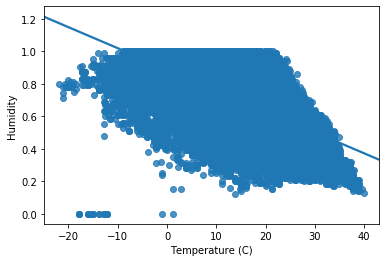

In [197]:
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Humidity"]) #ploting a scatter plot b/w temp and humidity

In [198]:
### as we can see in the plot above there is a presence of outliers in humidity so we have to remove them.

outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_data = detect_outlier(data_set["Humidity"])
print (outlier_data)

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


In [199]:
### removing outliers from humidity

data_set_clean = data_set[data_set["Humidity"]>0.15]

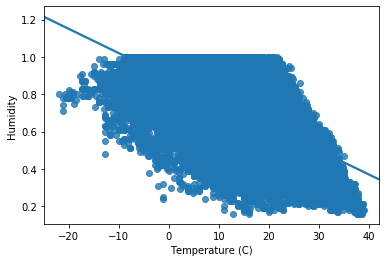

In [200]:
### plotting scatter plot

sns.regplot(x=data_set_clean["Temperature (C)"], y=data_set_clean["Humidity"])

In [201]:
### creating data sets

y= data_set_clean.iloc[:,[2]] # Dependent Data
y

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


In [202]:
X= data_set_clean.iloc[:,[1,3,4]] #Feature Data
X

,Precip Type,Apparent Temperature (C),Humidity
0,rain,7.388889,0.89
1,rain,7.227778,0.86
2,rain,9.377778,0.89
3,rain,5.944444,0.83
4,rain,6.977778,0.83
...,...,...,...
96448,rain,26.016667,0.43
96449,rain,24.583333,0.48
96450,rain,22.038889,0.56
96451,rain,21.522222,0.60


In [204]:
X1= pd.get_dummies(X, columns =['Precip Type'])
X1

,Apparent Temperature (C),Humidity,Precip Type_rain,Precip Type_snow
0,7.388889,0.89,1,0
1,7.227778,0.86,1,0
2,9.377778,0.89,1,0
3,5.944444,0.83,1,0
4,6.977778,0.83,1,0
...,...,...,...,...
96448,26.016667,0.43,1,0
96449,24.583333,0.48,1,0
96450,22.038889,0.56,1,0
96451,21.522222,0.60,1,0


In [205]:
### data spliting into test and train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)

In [206]:
### using MLRM to train set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
regressor.coef_
regressor.intercept_


array([4.36937561])

In [208]:
### predicting the test set

y_pred = regressor.predict(X_test)
y_pred_data=pd.DataFrame(y_pred)


In [211]:
regressor.score(X_train,y_train)


0.987306401824711

In [212]:

regressor.score(X_test,y_test)

0.9870720140762889

In [213]:
### root mean sq. error
from sklearn import metrics
import math
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0828963217076646


In [215]:
### Model Statistics

#Adding Intercept term to the model

X_train=sm.add_constant(X_train)
X_train


,const,Apparent Temperature (C),Humidity,Precip Type_rain,Precip Type_snow
11644,1.0,6.538889,0.79,1,0
27595,1.0,31.594444,0.29,1,0
31605,1.0,4.422222,0.86,1,0
77952,1.0,4.316667,0.80,1,0
15245,1.0,13.311111,0.84,1,0
...,...,...,...,...,...
21255,1.0,29.200000,0.35,1,0
45907,1.0,0.122222,0.85,1,0
42629,1.0,6.650000,0.93,1,0
43583,1.0,11.622222,0.96,1,0


In [216]:
X_test=sm.add_constant(X_test)
X_test

,const,Apparent Temperature (C),Humidity,Precip Type_rain,Precip Type_snow
66168,1.0,14.977778,0.93,1,0
28288,1.0,1.066667,0.76,1,0
8609,1.0,26.088889,0.47,1,0
13313,1.0,30.983333,0.40,1,0
70048,1.0,25.016667,0.32,1,0
...,...,...,...,...,...
27515,1.0,29.922222,0.33,1,0
11927,1.0,4.288889,0.74,1,0
79833,1.0,24.838889,0.70,1,0
66794,1.0,7.627778,0.53,1,0


In [217]:
### making the data frame

X_train_d=pd.DataFrame(X_train)
X_train_d

,const,Apparent Temperature (C),Humidity,Precip Type_rain,Precip Type_snow
11644,1.0,6.538889,0.79,1,0
27595,1.0,31.594444,0.29,1,0
31605,1.0,4.422222,0.86,1,0
77952,1.0,4.316667,0.80,1,0
15245,1.0,13.311111,0.84,1,0
...,...,...,...,...,...
21255,1.0,29.200000,0.35,1,0
45907,1.0,0.122222,0.85,1,0
42629,1.0,6.650000,0.93,1,0
43583,1.0,11.622222,0.96,1,0


In [218]:
### printing model statistics and getting the summary

model = sm.OLS(y_pred,X_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.910e+34
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:40:29   Log-Likelihood:             6.1767e+05
No. Observations:               19283   AIC:                        -1.235e+06
Df Residuals:                   19278   BIC:                        -1.235e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.3694   3.14e-16   1.39e+16      0.000       4.369       4.369
Apparent Temperature (C)     0.8505      3e-18   2.83e+17      0.000       0.851       0.851
Humidity                    -2.7424    1.4e-16  -1.96e+16      0.000      -2.742      -2.742
Precip Type_rain             0.3868   2.89e-16   1.34e+15      0.000       0.387       0.387
Precip Type_snow             0.0491   2.98e-16   1.65e+14      0.000       0.049       0.049
==============================================================================
Omnibus:                      567.670   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.652
Skew:                           0.437   Prob(JB):                    7.56e-135
Kurtosis:                       2.919   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
### checking vif value

from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(x_train.values, j) for j in range(x_train.shape[1])]

[1.5078213407598433, 1.5078213407598422]

In [220]:
vif = pd.DataFrame()
vif["features"] = X_train_d.columns
vif.round(1)

,features
0,const
1,Apparent Temperature (C)
2,Humidity
3,Precip Type_rain
4,Precip Type_snow


In [234]:
model1 = sm.OLS(y_pred,X_test).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.636e+10
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:46:04   Log-Likelihood:                 81537.
No. Observations:               19283   AIC:                        -1.631e+05
Df Residuals:                   19279   BIC:                        -1.630e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.4167      0.000    2.9e+04      0.000       4.416       4.417
Apparent Temperature (C)     0.8504   3.54e-06    2.4e+05      0.000       0.850       0.850
Humidity                    -2.7433      0.000  -1.65e+04      0.000      -2.744      -2.743
Precip Type_rain             0.3409   9.62e-05   3542.181      0.000       0.341       0.341
==============================================================================
Omnibus:                    32970.332   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20203815.240
Skew:                         -12.199   Prob(JB):                         0.00
Kurtosis:                     159.687   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
#Storing Coefficients in DataFrame along with coloumn names
coefficients = pd.concat([pd.DataFrame(X_train_d.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)

In [237]:
coefficients

,0,0
0,const,0.850500
1,Apparent Temperature (C),-2.742376
2,Humidity,0.386760
3,Precip Type_rain,0.049147
4,Precip Type_snow,NaN
